# **Mimesis Data Generator**

Mimesis is a robust data generator for Python that can produce a wide range of synthetic data in various languages. This tool is useful for populating testing databases, creating fake API endpoints, filling pandas DataFrames, generating JSON and XML files with custom structures, and anonymizing production data, among other purposes.

The purpose of this notebook is to attempt to create a sythetic AML dataset from a financial institution in Australia. The IBM Transactions for Anti Money Laundering (AML) will be used as a reference source to attempt to replicate a similar output.

https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml?select=HI-Large_Trans.csv

**Data Generation**

The first step is to install the mimesis library.

In [ ]:
!pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.3 MB/s eta 0:00:00


The code below provides a list of attributes and methods in the object named 'Fake' from the generic provider.

In [ ]:
from mimesis import Generic
from mimesis.locales import Locale

fake = Generic(Locale.EN_AU)
print(dir(fake))

['address', 'binaryfile', 'choice', 'code', 'cryptographic', 'datetime', 'development', 'file', 'finance', 'food', 'hardware', 'internet', 'numeric', 'path', 'payment', 'person', 'science', 'text', 'transport']


The code below shows the methods within the finance method.

In [ ]:
finance_methods = dir(fake.finance)
print(finance_methods)

['Meta', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dataset', '_extract', '_has_seed', '_load_dataset', '_override_locale', '_read_global_file', '_setup_locale', '_update_dict', 'bank', 'company', 'company_type', 'cryptocurrency_iso_code', 'cryptocurrency_symbol', 'currency_iso_code', 'currency_symbol', 'get_current_locale', 'locale', 'override_locale', 'price', 'price_in_btc', 'random', 'reseed', 'seed', 'stock_exchange', 'stock_name', 'stock_ticker', 'update_dataset', 'validate_enum']


A dataframe is created by calling different providers and the methods and a for loop is used to iterate over 1000 samples. An extra bit of code is added below the dataframe to ensure that only positive values are generated for transaction amounts and also, only unique transaction amounts.

In [ ]:
import pandas as pd
import numpy as np

AML_Data = pd.DataFrame(
   [
       {
           "transaction_datetime": fake.datetime.formatted_datetime(start=2020, end=2023),
           "from_bank": fake.finance.bank(),
           "from_account_number": np.random.randint(1, 1000000000),
           "to_bank": fake.finance.bank(),
           "to_account_number": np.random.randint(1, 1000000000),
           "transaction_amount": fake.finance.price(),
           "transaction_type": fake.choice(['PayID', 'BSB', 'Credit Card', 'BPAY'])
       }
       for _ in range(1000)
   ]
)


AML_Data.head()


,transaction_datetime,from_bank,from_account_number,to_bank,to_account_number,transaction_amount,transaction_type
0,02/09/2021 08:07:41,Hume Bank Limited,49394649,Bank of Queensland Limited,976679348,1037.91,PayID
1,05/08/2023 08:58:54,Summerland Credit Union Ltd,886636685,Central Murray Credit Union Ltd,269427867,1262.96,BPAY
2,15/02/2020 13:38:51,The Capricornian Ltd,413451898,Community First Credit Union Limited,150022968,843.13,BPAY
3,25/02/2022 12:08:28,Auswide Bank Ltd,663722878,Suncorp-Metway Limited,752328516,1458.15,BSB
4,11/10/2020 19:01:39,Westpac Banking Corporation,167071418,G&C Mutual Bank,433835021,858.60,Credit Card


**Exploratory Data Analysis (EDA)**

EDA is necessary to validate the data generated to ensure robustness and the make sure the quality of the data is acceptable for further modelling.

The first plot shows a line chart for the transaction date grouped by month.

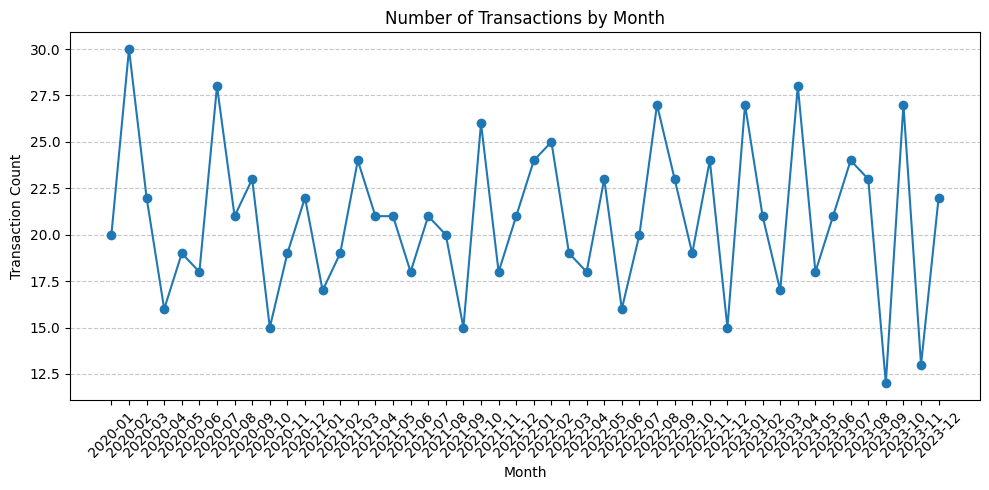

In [ ]:
import matplotlib.pyplot as plt

# Convert 'transaction_month_year' column to string
AML_Data['transaction_month_year'] = AML_Data['transaction_month_year'].astype(str)

# Group by transaction month and year and count the number of transactions
transaction_count_by_month_year = AML_Data.groupby('transaction_month_year').size().reset_index(name='transaction_count')

# Plot the count of transactions by month in a line chart
plt.figure(figsize=(10, 5))
plt.plot(transaction_count_by_month_year['transaction_month_year'], transaction_count_by_month_year['transaction_count'], marker='o', linestyle='-')
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The chart below displays the 'from_bank' counts.

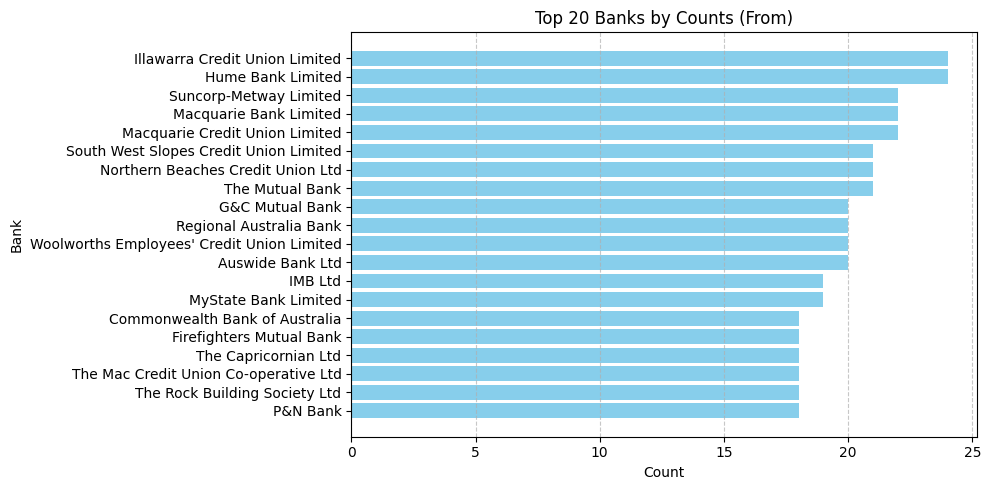

In [ ]:
import matplotlib.pyplot as plt

# Group by 'from_bank' and count occurrences
bank_counts_from = AML_Data.groupby('from_bank').size().reset_index(name='count_from')

# Sort the DataFrame by count in descending order
bank_counts_from = bank_counts_from.sort_values(by='count_from', ascending=True)

# Select only the top 20 banks by count
top_20_banks = bank_counts_from.tail(20)

# Plot the counts of top 20 banks from the 'from_bank' column in a horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_20_banks['from_bank'], top_20_banks['count_from'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bank')
plt.title('Top 20 Banks by Counts (From)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


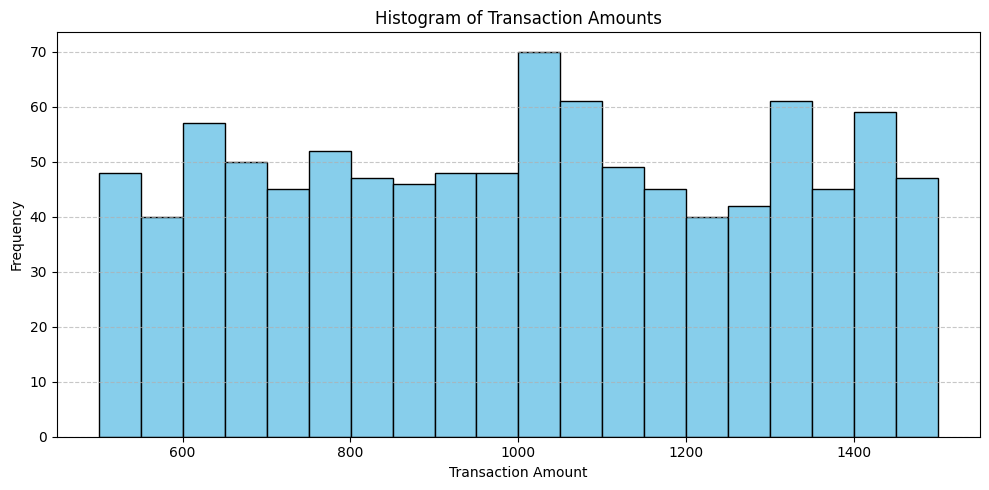

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of transaction amounts
plt.figure(figsize=(10, 5))
plt.hist(AML_Data['transaction_amount'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Group by 'transaction_type' and count occurrences
transaction_type_counts = AML_Data['transaction_type'].value_counts().reset_index()
transaction_type_counts.columns = ['Transaction Type', 'Count']

# Display the counts of transaction types in a table
print(transaction_type_counts)


  Transaction Type  Count
0             BPAY    265
1            PayID    246
2              BSB    246
3      Credit Card    243


### **Discussion**

The strength of Mimesis lies in the ability to generate data in many languages and to access many data providers specific to the language selected. An example given in the dataset created in this notebook is bank names.

Another strength is it's comparably faster run time and ability to produce more unique data (compared with Faker) (https://mimesis.name/en/master/about.html).

However, similar to Faker, there are limitations to Mimesis such as it's lack of ability to create data which resemebles the correct statistical properties of a similar dataset. For example, randomising certain features such as or transaction type will likely follow standard distributions but this may not always be the case.

